In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from statistics import *
from astropy import *
from astropy.io import fits

In [2]:
#trying what this website says: https://sdss-mangadap.readthedocs.io/en/latest/_modules/mangadap/util/fileio.html
import os
import warnings
import gzip
import shutil
import logging

def wavelength_vector(npix, header, log10=False):
    """
    Return a vector with wavelength coordinates drawn from the WCS
    coordinates in the header.  The function uses CRVAL1, CRPIX1,
    CDELT1.

    Args:
        npix (:obj:`int`):
            Length of the vector in pixels.
        header (`astropy.io.fits.Header`_):
            Header with the WCS data
        log10 (:obj:`bool`, optional):
            Flag that the wavelengths are logarithmically sampled.

    Returns:
        `numpy.ndarray`_: Wavelengths of a spectrum.

    """
    crval = float(header['CRVAL1'])
    crpix = int(header['CRPIX1'])
    cdelt = float(header['CDELT1'])
    wave = (np.arange(1.0,npix+1) - crpix)*cdelt + crval
    return np.power(10., wave) if log10 else wave

def readfits_1dspec(filename, log10=False):
    """
    Read a 1D fits spectrum and return two vectors with the wavelength
    and flux.

    Args:
        filename (:obj:`str`):
            Name of the file to read.

    Returns:
        `numpy.ndarray`_: Two numpy.float64 arrays with the
        wavelength and flux read for the spectrum.

    Raises:
        ValueError:
            Raised if the input fits file has more than one extension
            or its primary extension has more than two dimensions.
    """
    hdu = fits.open(filename, mode='readonly')

    if (len(hdu)) != 1:
        warnings.warn('{0} has more than one extension.'.format(filename))
    
    if hdu[0].header['NAXIS'] != 1:
        raise ValueError('{0} is not one dimensional!'.format(filename))
    
    spec = np.copy(hdu[0].data).astype(np.float64)
    wave = wavelength_vector(spec.size, hdu[0].header, log10=log10)
    hdu.close()
    return wave, spec

## Eu 4129

In [3]:
#export data
waveobs=readfits_1dspec('eu4129data.fits', log10=False)[0]
specobs=readfits_1dspec('eu4129data.fits', log10=False)[1]

In [4]:
#exported synthesis
wavesynth=readfits_1dspec('eu4129synth.fits', log10=False)[0]
specsynth=readfits_1dspec('eu4129synth.fits', log10=False)[1]

In [5]:
#plus error
plserrx=readfits_1dspec('eu4129+error.fits', log10=False)[0]
plserry=readfits_1dspec('eu4129+error.fits', log10=False)[1]

In [6]:
#minus error
minerrx=readfits_1dspec('eu4129-error.fits', log10=False)[0]
minerry=readfits_1dspec('eu4129-error.fits', log10=False)[1]

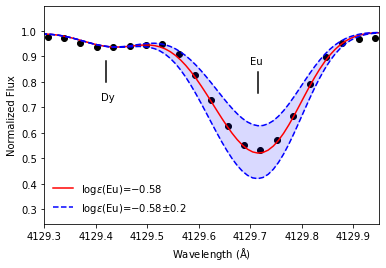

In [7]:
plt.scatter(waveobs,specobs,color='black')
plt.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Eu)=$-$0.58")
plt.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Eu)=$-$0.58$\pm0.2$")
plt.plot(minerrx,minerry,'b--')
plt.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)

plt.text(4129.7,0.87,'Eu')
plt.axvline(4129.715,0.6,0.7,color='black')
plt.text(4129.41,0.73,'Dy')
plt.axvline(4129.42,0.65,0.75,color='black')

plt.ticklabel_format(useOffset=False)
plt.xlabel(r"Wavelength $(\mathrm{\AA})$")
plt.ylabel('Normalized Flux')
plt.xlim(4129.3,4129.95)
plt.legend(loc='lower left', frameon=False)

## Ba 5853

In [8]:
#export data
waveobs=readfits_1dspec('ba5853data.fits', log10=False)[0]
specobs=readfits_1dspec('ba5853data.fits', log10=False)[1]

In [9]:
#exported synthesis
wavesynth=readfits_1dspec('ba5853synth.fits', log10=False)[0]
specsynth=readfits_1dspec('ba5853synth.fits', log10=False)[1]

(5853.4, 5854)

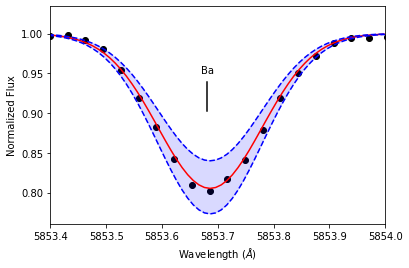

In [10]:
waveobs=readfits_1dspec('ba5853data.fits', log10=False)[0]
specobs=readfits_1dspec('ba5853data.fits', log10=False)[1]
wavesynth=readfits_1dspec('ba5853synth.fits', log10=False)[0]
specsynth=readfits_1dspec('ba5853synth.fits', log10=False)[1]
plserrx=readfits_1dspec('ba5853+error.fits', log10=False)[0]
plserry=readfits_1dspec('ba5853+error.fits', log10=False)[1]
minerrx=readfits_1dspec('ba5853-error.fits', log10=False)[0]
minerry=readfits_1dspec('ba5853-error.fits', log10=False)[1]


plt.scatter(waveobs,specobs,color='black')
plt.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Ba)=$-$0.42")
plt.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Ba)=$-$0.58$\pm0.2$")
plt.plot(minerrx,minerry,'b--')
plt.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
plt.xlabel(r"Wavelength $(\AA)$")
plt.ylabel('Normalized Flux')
plt.text(5853.67,0.95,'Ba')
plt.axvline(5853.68,0.52,0.65,color='black')
plt.xlim(5853.4,5854)

## Sr 4215

In [11]:
#export data
waveobs=readfits_1dspec('sr4215data.fits', log10=False)[0]
specobs=readfits_1dspec('sr4215data.fits', log10=False)[1]

In [12]:
#exported synthesis
wavesynth=readfits_1dspec('sr4215synth.fits', log10=False)[0]
specsynth=readfits_1dspec('sr4215synth.fits', log10=False)[1]

(4215.25, 4216)

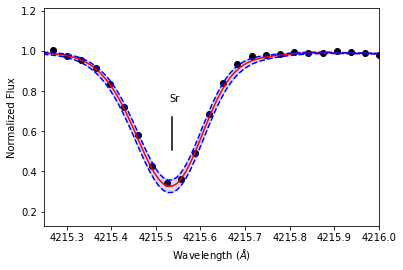

In [37]:
waveobs=readfits_1dspec('sr4215data.fits', log10=False)[0]
specobs=readfits_1dspec('sr4215data.fits', log10=False)[1]
wavesynth=readfits_1dspec('sr4215synth.fits', log10=False)[0]
specsynth=readfits_1dspec('sr4215synth.fits', log10=False)[1]
plserrx=readfits_1dspec('sr4215+error.fits', log10=False)[0]
plserry=readfits_1dspec('sr4215+error.fits', log10=False)[1]
minerrx=readfits_1dspec('sr4215-error.fits', log10=False)[0]
minerry=readfits_1dspec('sr4215-error.fits', log10=False)[1]


plt.scatter(waveobs,specobs,color='black')
plt.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Ba)=$-$0.42")
plt.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Ba)=$-$0.58$\pm0.2$")
plt.plot(minerrx,minerry,'b--')
plt.ticklabel_format(useOffset=False)
plt.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
plt.text(4215.53,0.75,'Sr')
plt.axvline(4215.537,0.35,0.5,color='black')
plt.xlabel(r"Wavelength $(\AA)$")
plt.ylabel('Normalized Flux')
plt.xlim(4215.25,4216)

## Th 4019

In [14]:
#export data
waveobs=readfits_1dspec('th4019data.fits', log10=False)[0]
specobs=readfits_1dspec('th4019data.fits', log10=False)[1]

In [15]:
#exported synthesis
wavesynth=readfits_1dspec('th4019synth.fits', log10=False)[0]
specsynth=readfits_1dspec('th4019synth.fits', log10=False)[1]

(0.8, 1.1)

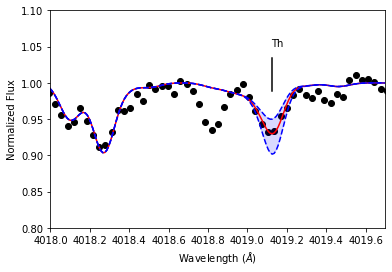

In [54]:
waveobs=readfits_1dspec('th4019data.fits', log10=False)[0]
specobs=readfits_1dspec('th4019data.fits', log10=False)[1]
wavesynth=readfits_1dspec('th4019synth.fits', log10=False)[0]
specsynth=readfits_1dspec('th4019synth.fits', log10=False)[1]
plserrx=readfits_1dspec('th4019+error.fits', log10=False)[0]
plserry=readfits_1dspec('th4019+error.fits', log10=False)[1]
minerrx=readfits_1dspec('th4019-error.fits', log10=False)[0]
minerry=readfits_1dspec('th4019-error.fits', log10=False)[1]

plt.scatter(waveobs,specobs,color='black')
plt.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Th)=$-$1.11")
plt.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Th)=$-$1.11$\pm0.2$")
plt.plot(minerrx,minerry,'b--')
plt.ticklabel_format(useOffset=False)
plt.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
plt.text(4019.12,1.05,'Th')
plt.axvline(4019.127,0.63,0.78,color='black')
plt.xlabel(r"Wavelength $(\AA)$")
plt.ylabel('Normalized Flux')
#plt.xlim(4018.95,4019.3)
plt.xlim(4018,4019.7)
plt.ylim(0.8,1.1)

## Th 4094

In [17]:
#export data
waveobs=readfits_1dspec('th4094data.fits', log10=False)[0]
specobs=readfits_1dspec('th4094data.fits', log10=False)[1]

In [18]:
#exported synthesis
wavesynth=readfits_1dspec('th4094synth.fits', log10=False)[0]
specsynth=readfits_1dspec('th4094synth.fits', log10=False)[1]

(0.8, 1.1)

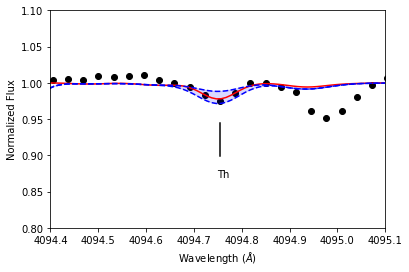

In [58]:
waveobs=readfits_1dspec('th4094data.fits', log10=False)[0]
specobs=readfits_1dspec('th4094data.fits', log10=False)[1]
wavesynth=readfits_1dspec('th4094synth.fits', log10=False)[0]
specsynth=readfits_1dspec('th4094synth.fits', log10=False)[1]
plserrx=readfits_1dspec('th4094+error.fits', log10=False)[0]
plserry=readfits_1dspec('th4094+error.fits', log10=False)[1]
minerrx=readfits_1dspec('th4094-error.fits', log10=False)[0]
minerry=readfits_1dspec('th4094-error.fits', log10=False)[1]

plt.scatter(waveobs,specobs,color='black')
plt.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Th)=$-$1.11")
plt.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Th)=$-$1.11$\pm0.2$")
plt.plot(minerrx,minerry,'b--')
plt.ticklabel_format(useOffset=False)
plt.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
plt.xlabel(r"Wavelength $(\AA)$")
plt.ylabel('Normalized Flux')
plt.text(4094.748,0.87,'Th')
plt.axvline(4094.755,0.33,0.48,color='black')
#plt.xlim(4094.6,4094.9)
plt.xlim(4094.4,4095.1)
plt.ylim(0.8,1.1)

(0.85, 1.1)

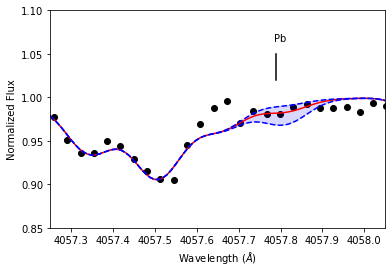

In [68]:
waveobs=readfits_1dspec('pb4057data.fits', log10=False)[0]
specobs=readfits_1dspec('pb4057data.fits', log10=False)[1]
wavesynth=readfits_1dspec('pb4057syn.fits', log10=False)[0]
specsynth=readfits_1dspec('pb4057syn.fits', log10=False)[1]
plserrx=readfits_1dspec('pb4057+err.fits', log10=False)[0]
plserry=readfits_1dspec('pb4057+err.fits', log10=False)[1]
minerrx=readfits_1dspec('pb4057-error.fits', log10=False)[0]
minerry=readfits_1dspec('pb4057-error.fits', log10=False)[1]
continuumx=readfits_1dspec('pb4057-inf.fits', log10=False)[0]
continuumy=readfits_1dspec('pb4057-inf.fits', log10=False)[1]

plt.scatter(waveobs,specobs,color='black')
plt.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Th)=$-$1.11")
plt.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Th)=$-$1.11$\pm0.2$")
plt.plot(minerrx,minerry,'b--')
plt.ticklabel_format(useOffset=False)
plt.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
plt.xlabel(r"Wavelength $(\AA)$")
plt.ylabel('Normalized Flux')
#plt.text(4094.748,0.87,'Th')
#plt.axvline(4094.755,0.33,0.48,color='black')
plt.text(4057.785,1.065,'Pb')
plt.axvline(4057.79,0.68,0.8,color='black')
#plt.xlim(4094.6,4094.9)
plt.xlim(4057.25,4058.05)
plt.ylim(0.85,1.1)

## Subplot

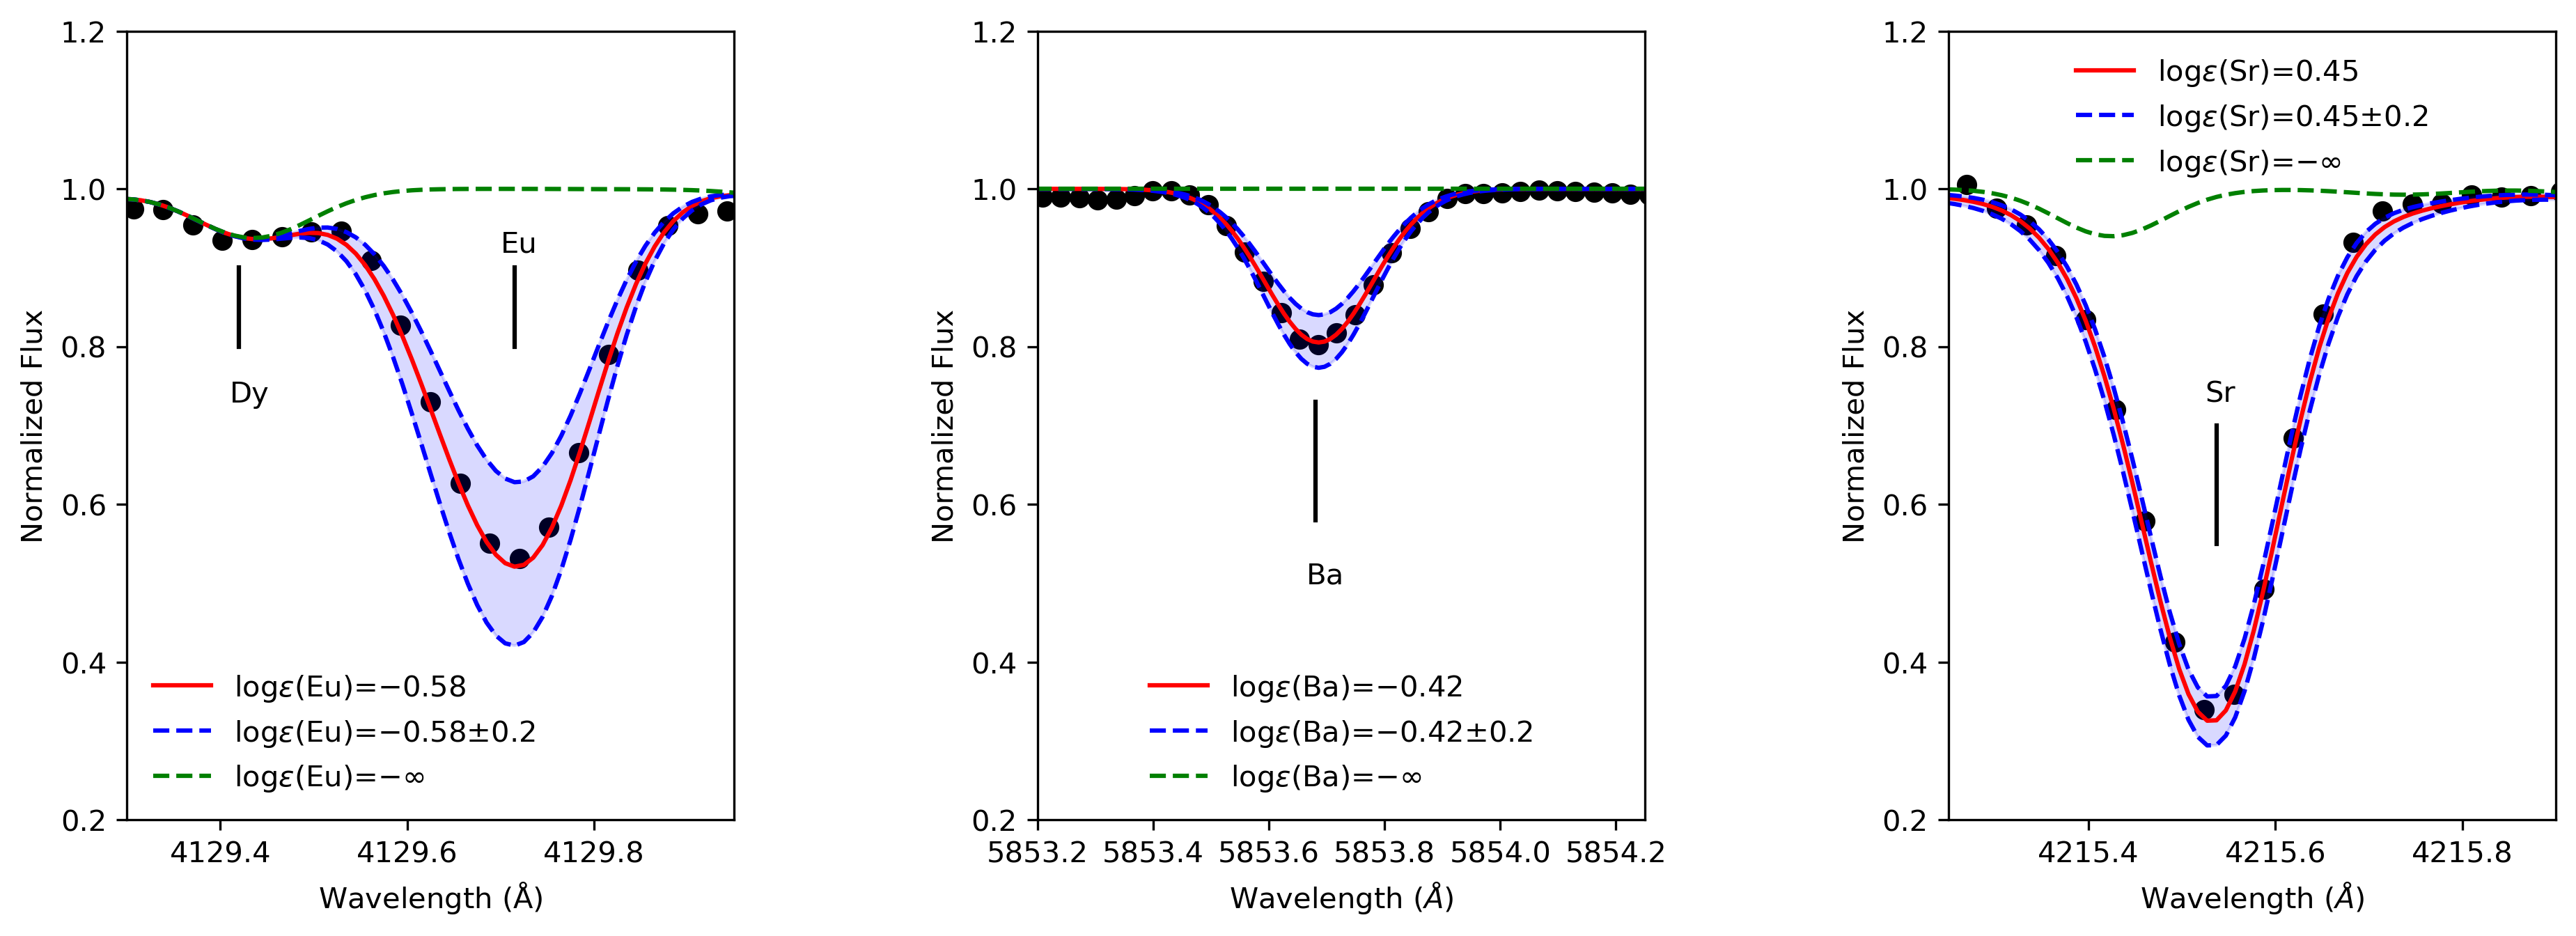

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), dpi=300,
                        gridspec_kw={'hspace': 0.3, 'wspace': 0.5})

(ax1,ax2,ax3) = axs

#Eu4129
waveobs=readfits_1dspec('eu4129data.fits', log10=False)[0]
specobs=readfits_1dspec('eu4129data.fits', log10=False)[1]
wavesynth=readfits_1dspec('eu4129synth.fits', log10=False)[0]
specsynth=readfits_1dspec('eu4129synth.fits', log10=False)[1]
plserrx=readfits_1dspec('eu4129+error.fits', log10=False)[0]
plserry=readfits_1dspec('eu4129+error.fits', log10=False)[1]
minerrx=readfits_1dspec('eu4129-error.fits', log10=False)[0]
minerry=readfits_1dspec('eu4129-error.fits', log10=False)[1]
continuumx=readfits_1dspec('eu4129-10.fits', log10=False)[0]
continuumy=readfits_1dspec('eu4129-10.fits', log10=False)[1]
ax1.scatter(waveobs,specobs,color='black')
ax1.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Eu)=$-$0.58")
ax1.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Eu)=$-$0.58$\pm0.2$")
ax1.plot(minerrx,minerry,'b--')
ax1.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Eu)=$-\infty$")
ax1.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)

ax1.text(4129.7,0.92,'Eu')
ax1.axvline(4129.715,0.6,0.7,color='black')
ax1.text(4129.41,0.73,'Dy')
ax1.axvline(4129.42,0.6,0.7,color='black')

ax1.ticklabel_format(useOffset=False)
ax1.set_xlabel(r"Wavelength $(\mathrm{\AA})$")
ax1.set_ylabel('Normalized Flux')
ax1.set_xlim(4129.3,4129.95)
ax1.set_ylim(0.2,1.2)
ax1.legend(loc='lower left', frameon=False)

#Ba5853
waveobs=readfits_1dspec('ba5853data.fits', log10=False)[0]
specobs=readfits_1dspec('ba5853data.fits', log10=False)[1]
wavesynth=readfits_1dspec('ba5853synth.fits', log10=False)[0]
specsynth=readfits_1dspec('ba5853synth.fits', log10=False)[1]
plserrx=readfits_1dspec('ba5853+error.fits', log10=False)[0]
plserry=readfits_1dspec('ba5853+error.fits', log10=False)[1]
minerrx=readfits_1dspec('ba5853-error.fits', log10=False)[0]
minerry=readfits_1dspec('ba5853-error.fits', log10=False)[1]
continuumx=readfits_1dspec('ba5853-10.fits', log10=False)[0]
continuumy=readfits_1dspec('ba5853-10.fits', log10=False)[1]

ax2.scatter(waveobs,specobs,color='black')
ax2.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Ba)=$-$0.42")
ax2.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Ba)=$-$0.42$\pm0.2$")
ax2.plot(minerrx,minerry,'b--')
ax2.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Ba)=$-\infty$")
ax2.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax2.set_xlabel(r"Wavelength $(\AA)$")
ax2.set_ylabel('Normalized Flux')
ax2.text(5853.665,0.5,'Ba')
ax2.axvline(5853.68,0.38,0.53,color='black')
#original: ax2.set_xlim(5853.4,5854)
ax2.set_xlim(5853.2,5854.25)
ax2.set_ylim(0.2,1.2)
ax2.legend(loc='lower center', frameon=False)

#Sr4215
waveobs=readfits_1dspec('sr4215data.fits', log10=False)[0]
specobs=readfits_1dspec('sr4215data.fits', log10=False)[1]
wavesynth=readfits_1dspec('sr4215synth.fits', log10=False)[0]
specsynth=readfits_1dspec('sr4215synth.fits', log10=False)[1]
plserrx=readfits_1dspec('sr4215+error.fits', log10=False)[0]
plserry=readfits_1dspec('sr4215+error.fits', log10=False)[1]
minerrx=readfits_1dspec('sr4215-error.fits', log10=False)[0]
minerry=readfits_1dspec('sr4215-error.fits', log10=False)[1]
continuumx=readfits_1dspec('sr4215-10.fits', log10=False)[0]
continuumy=readfits_1dspec('sr4215-10.fits', log10=False)[1]

ax3.scatter(waveobs,specobs,color='black')
ax3.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Sr)=0.45")
ax3.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Sr)=0.45$\pm0.2$")
ax3.plot(minerrx,minerry,'b--')
ax3.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Sr)=$-\infty$")
ax3.ticklabel_format(useOffset=False)
ax3.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax3.text(4215.525,0.73,'Sr')
ax3.axvline(4215.537,0.35,0.5,color='black')
ax3.set_xlabel(r"Wavelength $(\AA)$")
ax3.set_ylabel('Normalized Flux')
#original: ax3.set_xlim(4215.3,4215.8)
ax3.set_xlim(4215.25,4215.9)
ax3.set_ylim(0.2,1.2)
ax3.legend(loc='upper center', frameon=False)


fig.savefig('rprocspectra1.png', dpi=300)
#plt.figure(dpi=150)

Text(0, 0.5, 'Normalized Flux')

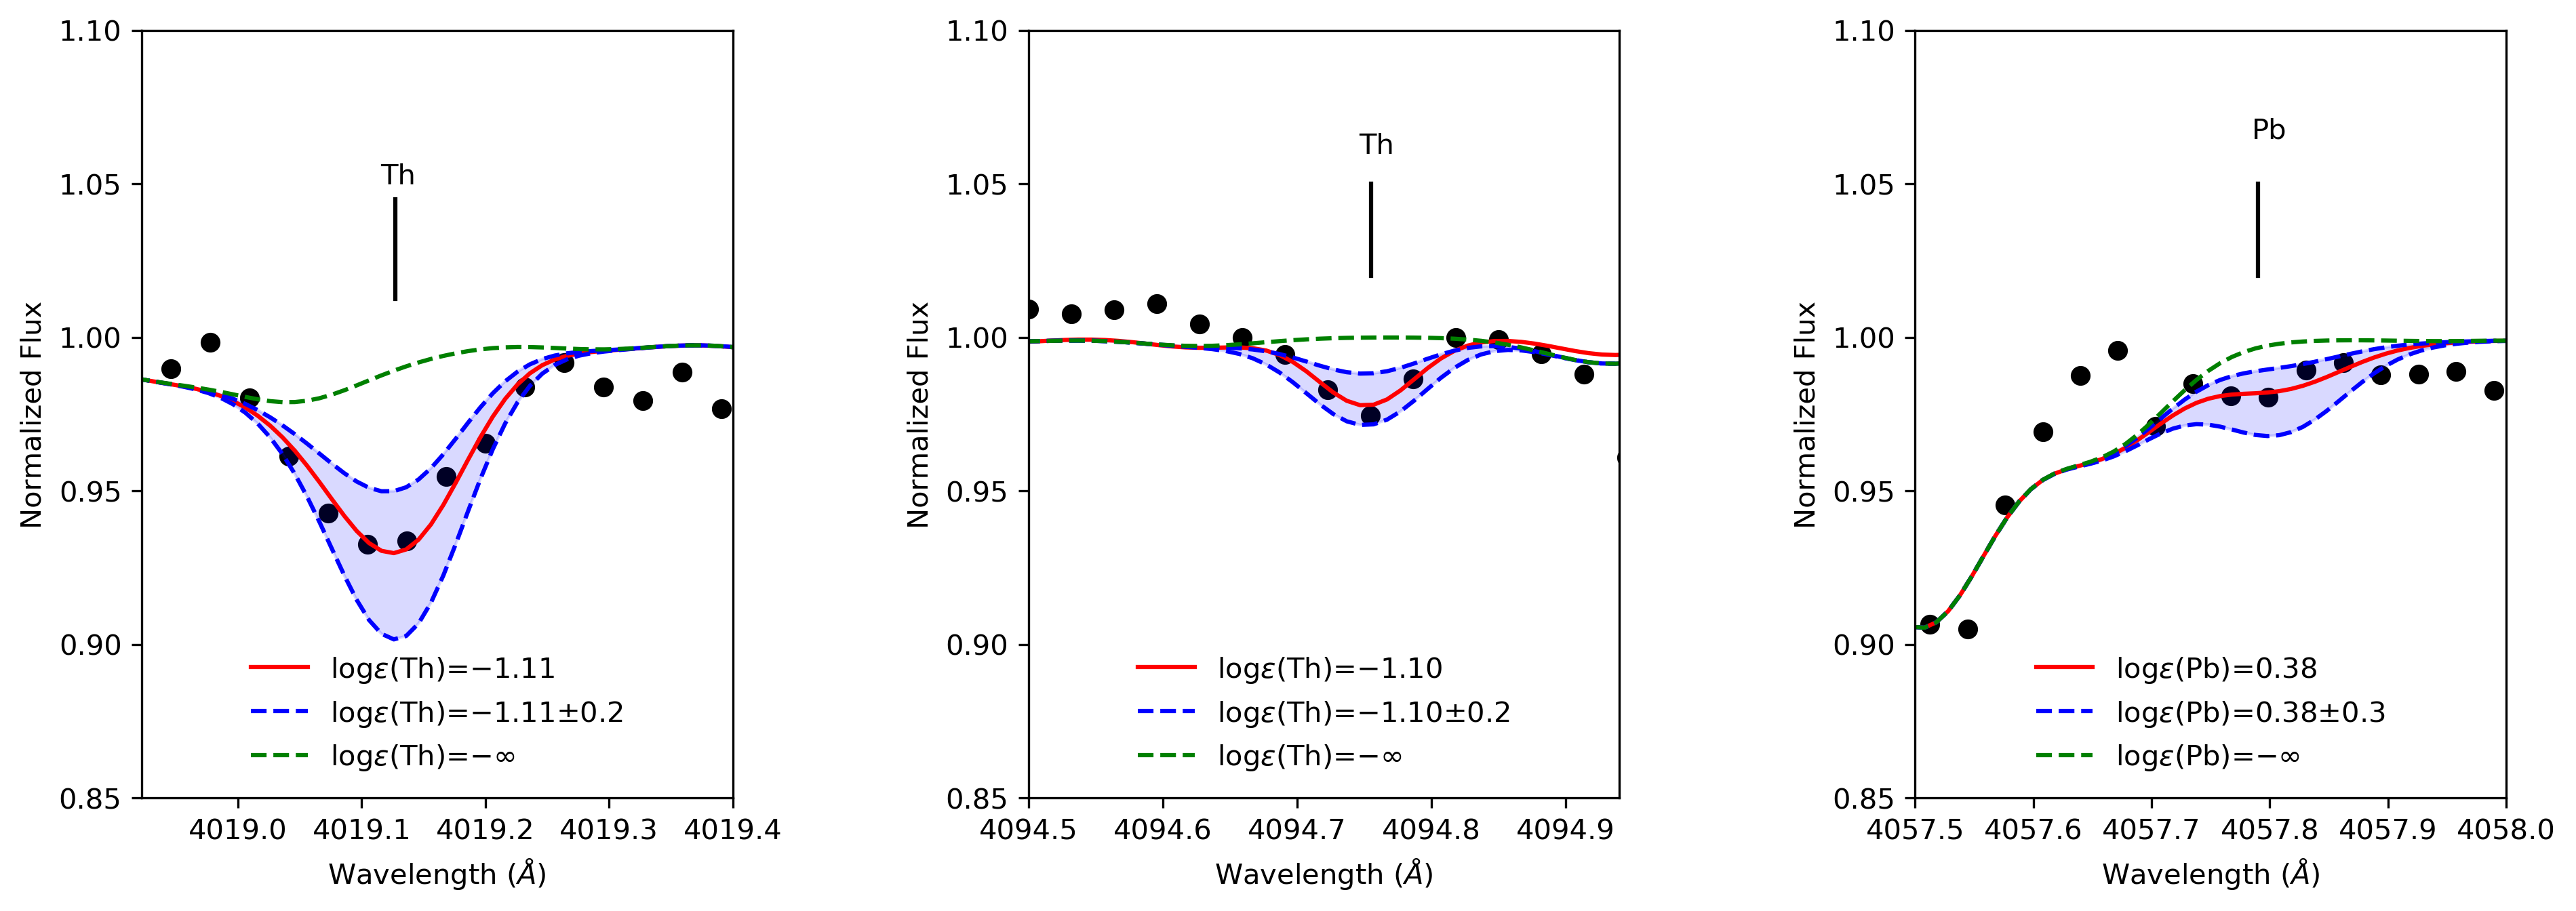

In [53]:
#Neutron Capture Elements
fig, axs = plt.subplots(1, 3, figsize=(15,5), dpi=300,
                        gridspec_kw={'hspace': 0.3, 'wspace': 0.5})

(ax1,ax2,ax3) = axs
#Th4019
waveobs=readfits_1dspec('th4019data.fits', log10=False)[0]
specobs=readfits_1dspec('th4019data.fits', log10=False)[1]
wavesynth=readfits_1dspec('th4019synth.fits', log10=False)[0]
specsynth=readfits_1dspec('th4019synth.fits', log10=False)[1]
plserrx=readfits_1dspec('th4019+error.fits', log10=False)[0]
plserry=readfits_1dspec('th4019+error.fits', log10=False)[1]
minerrx=readfits_1dspec('th4019-error.fits', log10=False)[0]
minerry=readfits_1dspec('th4019-error.fits', log10=False)[1]
continuumx=readfits_1dspec('th4019-inf.fits', log10=False)[0]
continuumy=readfits_1dspec('th4019-inf.fits', log10=False)[1]

ax1.scatter(waveobs,specobs,color='black')
ax1.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Th)=$-$1.11")
ax1.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Th)=$-$1.11$\pm0.2$")
ax1.plot(minerrx,minerry,'b--')
ax1.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Th)=$-\infty$")
ax1.ticklabel_format(useOffset=False)
ax1.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax1.text(4019.115,1.05,'Th')
ax1.axvline(4019.127,0.65,0.78,color='black')
ax1.set_xlabel(r"Wavelength $(\AA)$")
ax1.set_ylabel('Normalized Flux')
#og: ax1.set_xlim(4018.95,4019.3)
ax1.set_xlim(4018.922,4019.4)
ax1.set_ylim(0.85,1.1)
ax1.legend(loc='lower center', frameon=False)

#Th4094
waveobs=readfits_1dspec('th4094data.fits', log10=False)[0]
specobs=readfits_1dspec('th4094data.fits', log10=False)[1]
wavesynth=readfits_1dspec('th4094synth.fits', log10=False)[0]
specsynth=readfits_1dspec('th4094synth.fits', log10=False)[1]
plserrx=readfits_1dspec('th4094+error.fits', log10=False)[0]
plserry=readfits_1dspec('th4094+error.fits', log10=False)[1]
minerrx=readfits_1dspec('th4094-error.fits', log10=False)[0]
minerry=readfits_1dspec('th4094-error.fits', log10=False)[1]
continuumx=readfits_1dspec('th4094-inf.fits', log10=False)[0]
continuumy=readfits_1dspec('th4094-inf.fits', log10=False)[1]

ax2.scatter(waveobs,specobs,color='black')
ax2.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Th)=$-$1.10")
ax2.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Th)=$-$1.10$\pm0.2$")
ax2.plot(minerrx,minerry,'b--')
ax2.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Th)=$-\infty$")
ax2.ticklabel_format(useOffset=False)
ax2.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax2.set_xlabel(r"Wavelength $(\AA)$")
ax2.set_ylabel('Normalized Flux')
ax2.text(4094.746,1.06,'Th')
ax2.axvline(4094.755,0.68,0.8,color='black')
#og: ax2.set_xlim(4094.6,4094.9)
ax2.set_xlim(4094.5,4094.94)
ax2.set_ylim(0.85,1.1)
ax2.legend(loc='lower center', frameon=False)

#Pb4057
waveobs=readfits_1dspec('pb4057data.fits', log10=False)[0]
specobs=readfits_1dspec('pb4057data.fits', log10=False)[1]
wavesynth=readfits_1dspec('pb4057syn.fits', log10=False)[0]
specsynth=readfits_1dspec('pb4057syn.fits', log10=False)[1]
plserrx=readfits_1dspec('pb4057+err.fits', log10=False)[0]
plserry=readfits_1dspec('pb4057+err.fits', log10=False)[1]
minerrx=readfits_1dspec('pb4057-error.fits', log10=False)[0]
minerry=readfits_1dspec('pb4057-error.fits', log10=False)[1]
continuumx=readfits_1dspec('pb4057-inf.fits', log10=False)[0]
continuumy=readfits_1dspec('pb4057-inf.fits', log10=False)[1]

ax3.scatter(waveobs,specobs,color='black')
ax3.plot(wavesynth,specsynth,color='red',label=r"$\log\epsilon$(Pb)=$0.38$")
ax3.plot(plserrx,plserry,'b--',label=r"$\log\epsilon$(Pb)=0.38$\pm0.3$")
ax3.plot(minerrx,minerry,'b--')
ax3.plot(continuumx,continuumy,'g--',label=r"$\log\epsilon$(Pb)=$-\infty$")
ax3.fill_between(wavesynth, plserry, minerry, color='b', alpha=0.15)
ax3.text(4057.785,1.065,'Pb')
ax3.axvline(4057.79,0.68,0.8,color='black')
#ax3.set_xlim(4057.68,4057.9)
ax3.set_xlim(4057.5,4058)
ax3.set_ylim(0.85,1.1)
ax3.ticklabel_format(useOffset=False)
ax3.legend(loc='lower center', frameon=False)
ax3.set_xlabel(r"Wavelength $(\AA)$")
ax3.set_ylabel('Normalized Flux')

#fig.savefig('rprocspectra2.png', dpi=300)

## Star Comp

In [13]:
#My Star
j0010=np.genfromtxt("iso15_2.5.txt", delimiter=",", names=["x","a", "b", "logt","logg","c","d","e","f"])
#waveobs=readfits_1dspec('stitched_norm.fits', log10=False)[0]
#specobs=readfits_1dspec('stitched_norm.fits', log10=False)[1]
plt.plot(waveobs,specobs,color='black')

FileNotFoundError: [Errno 2] No such file or directory: 'stitched_norm.fits'